# Assingment 5 - GR10NR5

<b>NB! Our code is not the most stable code in the world. Therefore, try and run the code multiple times if you get a error message or if the plots have a funny size :p </b>


### Part i) and ii) 

To solve the coffee cooling problem, we can use the following differential equation (1):

$$ \frac{dT}{dt} = -r (T-T_{s}) $$

where T is the temperature of the coffee, T<sub>s</sub> is the temperature of the surroundings and r is the cooling constant.


The analytical solution was found by using the formula (2):

$$ T(t) = T_{s} + (T_{0}-T_{s})exp(-rt) $$

where T<sub>0</sub> = initial temperature of the coffee 
and t = cooling time.

The numerical solution was found by using <i> Euler's method: <i>

$$ x(t + dt) \approx x(t) + dt f(x(t), t) $$

where
    $$ dt = \frac{(b-a)}{n} $$
    
b is the end value and a is the starting value of the intervall.
And
    $$ f = \frac{dT}{dt} $$

The following constants are given in the problem:
<ul>
    <li> T<sub>0</sub> = 83 <sup>o</sup>C </li>
    <li> T<sub>S</sub> = 22.8 <sup>o</sup>C </li>
    <li> r = 0.1 </li> min<sup>-1</sup>
    
</ul>
    

#### Part iii)
The slider was made by the python pack <i> interact <i> and <i> Intslider <i> from ipywidgets, and is displayed in the graph below.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from ipywidgets import interact, IntSlider

#constants
T0 = 83 #[celcius]
Ts = 22 #[celcius]
r = 0.1 #[min-1]

#The analytical solution. Part i:

def T(t, r0, T00, Ts0):   #equation 2 
    return Ts0 + (T00 - Ts0)*np.exp(-r0*t) 

t50 = np.arange(0, 50.1, 0.1)  #Making a list with time interval from 0 to 50 minutes.
Tanalytisk = []

for i in range(len(t50)):  #adding temperature values corresponding to the time interval using eq. (2)
    Tanalytisk.append(T(t50[i],r, T0, Ts))
    
#Numerical solution. Part ii:
tslutt = 50
dt = 1

def f(T, r): #f is dT/dt in our code.
    return -r*(T-Ts)

def euler(f, r, T0, dt): #Euler's method. Gives a two list: one with temperature and one with time.
    Tn = [T0]
    tn = [0]
    while(tn[-1] < tslutt):
        t, y = tn[-1], Tn[-1]
        Tn.append(y + dt*f(y, r))
        tn.append(t + dt)
    return (np.array(tn), np.array(Tn))


tnnn, Tnnn = euler(f, r, T0, dt) #Global variables for Euler's method used later in the assignment.

def plot(dt): #This function plots the graph and is used to make the plot interactive.
    tnn, Tnn = euler(f, r, T0, dt)
    plt.plot(t50, Tanalytisk,label="Analytical")
    plt.plot(tnn, Tnn, label = "Numerical") #Numerical solution
    plt.xlabel("Time [min]")
    plt.ylabel("Temperature [C]")
    plt.title("Analytical solution T(t) VS Numerical Solution")
    plt.legend()
    plt.rcParams["figure.figsize"]=15,10
    plt.grid()
    plt.show()
    
håndtak = IntSlider(value = dt, min = 1, max = 8, step = 1, description = "dt") #making a slider for dt.
interact(plot, dt = håndtak) #making the plot interact with the slider.


interactive(children=(IntSlider(value=1, description='dt', max=8, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot(dt)>

As the graph shows, the analytical and the numerical solutions are very similar and depends on the value of dt. We can see that if dt is smaller, the differences between the graphs becomes smaller.

### Part iv-v)

For these parts we use the data from the datafile given for the assigment, and open them with the function <i> open.<i>
To create a graph of the data, it was necessary to split the temperature data from the time data and put into their own lists.
    
The graph was then plotted with the analytical and numerical solutions to compare.

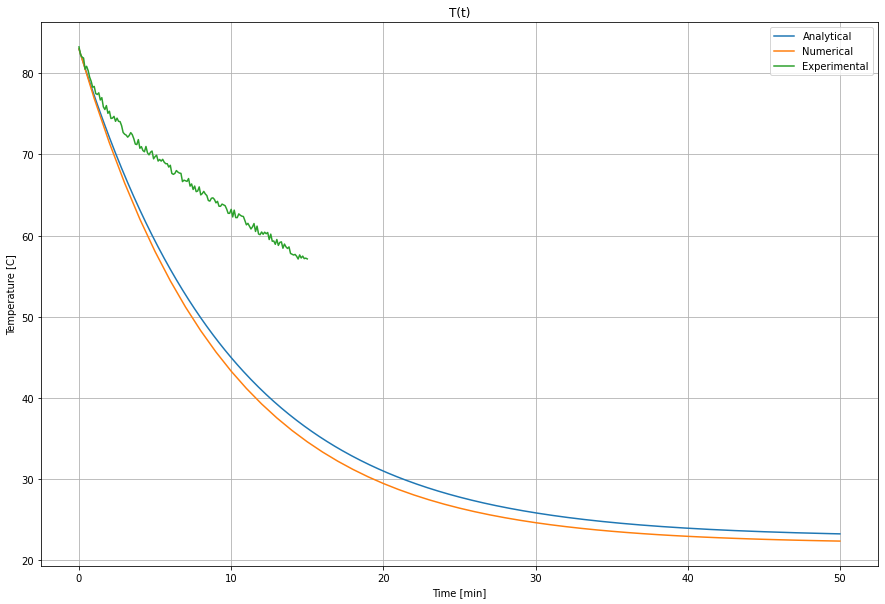

In [50]:
#Opening, reading and collecting the data from the file:
with open("Ex5_inputdata.dat") as f:
    data = f.readlines()

#Puts the data into two lists: one for temperature and one for time.
time = []
temp = []

for i in range(4, len(data)): #starting on the forth line because the three first lines are not measurements.
    t, T = data[i].split(";")
    time.append(t)
    temp.append(T)
    
#Removing \n from the temperature and changing the temperature and time from a string to a number. 
for i in range(len(temp)):
    temp[i] = float(temp[i].strip("\n"))
    time[i] = float(time[i])

#Ts is changed, therefore we need a new list for the analytical temperature with the new constant
Ts_fixed = 22.8 #[Celcius]
Tanalytisk1 = []

def T(t, r0, T00, Ts0):   #equation 2. This function is repeated to make the code more stable, so that the cells are more independent.
    return Ts0 + (T00 - Ts0)*np.exp(-r0*t)  

for i in range(len(t50)):  #adding temperature values corresponding to the time interval using eq. (2)
    Tanalytisk1.append(T(t50[i],r, T0, Ts_fixed))

#plotting the experimental values against the two models from the previous task.   
plt.plot(t50, Tanalytisk1,label="Analytical") #Analytical solution
plt.plot(tnnn, Tnnn, label = "Numerical") #Numerical solution
plt.plot(time, temp, label = "Experimental")
plt.xlabel("Time [min]")
plt.ylabel("Temperature [C]")
plt.title("T(t)")
plt.legend()
plt.rcParams["figure.figsize"]=10,15
plt.grid()
plt.show()



As illustrated in the plot, the experimental data and the models has the same starting point, but the experimental values has a lower cooling rate than the models.

In order to make a better fit between the models and the experimental values, the constants r and T<sub>0</sub> were varied. We concluded that when T<sub>S</sub> is fixed to 22.8 <sup>o</sup>C, the models fit the experimental values the best when the cooling rate, <i> r <i> is at 0.04 min<sup>-1</sup>, and T<sub>0</sub> is unchanged.

### Part vii)
Due to SOLVER in EXCEL, the new value for r is 0.03 min<sup>-1</sup>


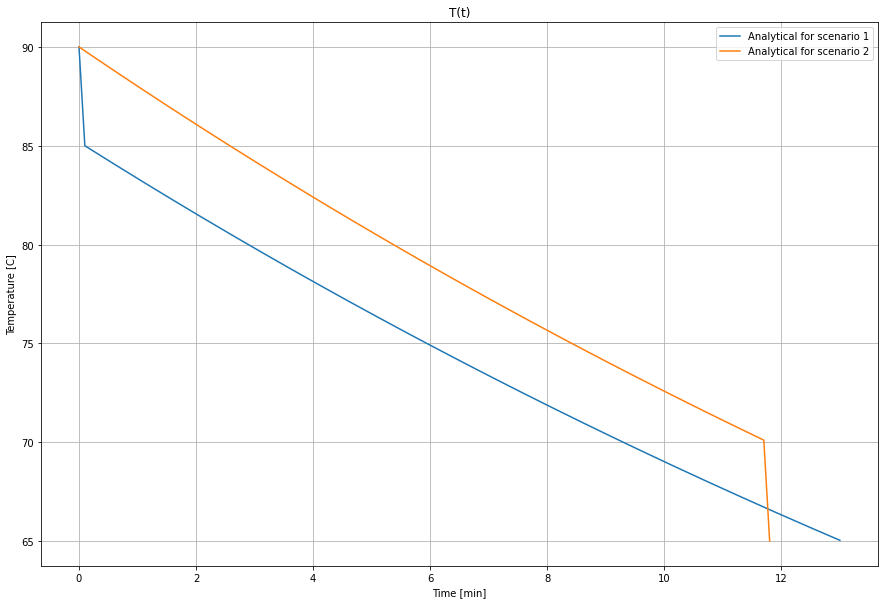

For scenario 1: 13.0 min
For scenario 2: 11.8 min


In [52]:
rny = 0.03


#Scenario 1: Cream added in the beginning
T01 = 85

Ta11 = [] #Analytial temperature. Ta11 = temperature analytical scenario 1 list 1
Ta12 = [90] #Temperature for scenario 1 with temperatures above 65 celcius. 90 is added as a starting point.
tid1 = [0] #time cutted in order to correspond with Ta12. Therefore the list starts with 0. 

for i in range(len(t50)):   #adding the temperature values in Ta11 using eq. 2.
    Ta11.append(T(t50[i],rny, T01, Ts_fixed))

for i in range(len(t50)):  #adding all temperature values above 65 degrees to Ta12.
    if Ta11[i] >= 65:
        Ta12.append(Ta11[i])
        tid1.append(tid1[-1] +0.1) #adding the corresponding time values into tid1.


#Scenario 2: Cream added at 70 degrees celcius.
T02 = 90

Ta21 = []
Ta22 = []
tid2 = [0]
    
for i in range(len(t50)): #the same procedure as above
    Ta21.append(T(t50[i],rny,T02, Ts_fixed))

for i in range(len(t50)): #adding all temperature values above 70 degrees to Ta22.
    if Ta21[i] >= 70:
        Ta22.append(Ta21[i])
        tid2.append(tid2[-1] +0.1)

Ta22.append(65) #adding the datapoint because the cream is added after 70 degrees.

#Plotting the two scenarios
  
plt.plot(tid1, Ta12,label="Analytical for scenario 1") 
plt.plot(tid2, Ta22,label="Analytical for scenario 2")
plt.xlabel("Time [min]")
plt.ylabel("Temperature [C]")
plt.title("T(t)")
plt.legend()
plt.grid()
plt.rcParams["figure.figsize"]=15,10
plt.show()


print(f"For scenario 1: {round(tid1[-1], 2)} min")
print(f"For scenario 2: {round(tid2[-1], 2)} min")


First thought for this part was that the second option is most efficient. This is because the cooling rate is largest in the first mintues and decreases over time. That is illustrated in the simulation above where we can see that it takes shorter time to reach 65 degrees when the cream is added when the temperature has reached 70 degrees.